# 코로나 분석

### 작성자

ZirAjs (임준서)

### 일러두기

내가 참조한 데이터는 https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data 이고

1/22/20-12/14/22까지의 국가별 확진자수 통계를 가지고 있다. 통계자료는 국가별 누적 확진자수로 되어있다. 그러나 나는 신규 확진자수에 집중할 것이며, 이 글에서 나온 '확진자수'는 신규 확진자수를 의미한다.


## 데이터 가공

우선 csv파일의 데이터를 python코드로 읽었다.


In [114]:
%matplotlib inline

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# pyplot 설정
plt.rc('font', family='Malgun Gothic')

path = "./time_series_covid19_confirmed_global.csv"
data = {}
date_label = None


# 통계를 확인할 국가 이름
target_reigion = "Korea  South"


def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False


with open(path, "r", encoding="UTF-8") as f:
    raw_data = list(map(lambda x: x.strip(
        ','), f.read().replace('"', '').strip('\n').split('\n')))
    date_label = np.array(raw_data.pop(0).split(',')[4:])
    for item in raw_data:
        temp = item.split(',')
        if isfloat(temp[1]):
            data[temp[0]] = np.array(list(map(lambda x: int(x), temp[3:])))
        elif isfloat(temp[2]):
            data[temp[0]+" "+temp[1]
                 ] = np.array(list(map(lambda x: int(x), temp[4:])))
        else:
            data[temp[0]+" "+temp[1]
                 ] = np.array(list(map(lambda x: int(x), temp[5:])))


아래 출력 값을 통해 자료가 있는 국가 목록을 확인할 수 있다.


In [116]:
# 국가 이름 우리나라: 'Korea  South'
print(data.keys())


dict_keys(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australian Capital Territory Australia', 'New South Wales Australia', 'Northern Territory Australia', 'Queensland Australia', 'South Australia Australia', 'Tasmania Australia', 'Victoria Australia', 'Western Australia Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Alberta Canada', 'British Columbia Canada', 'Diamond Princess Canada', 'Grand Princess Canada', 'Manitoba Canada', 'New Brunswick Canada', 'Newfoundland and Labrador Canada', 'Northwest Territories Canada', 'Nova Scotia Canada', 'Nunavut Canada', 'Ontario Canada', 'Prince Edward Island Canada', 'Quebec Canada', 'Repatriated Travellers Canada', 'Saskatchewan

자료가 누적 확진수로 되어있어서 1일 확진자수로 변환해준다.
그리고 한국의 자료를 사용할 것이므로 korea_data 변수에 저장한다.


In [117]:
import copy
print(data["Afghanistan"].dtype)


def cumulative_to_daily(cumulative: np.ndarray):
    sub = copy.deepcopy(cumulative)
    sub = sub[:-1]
    sub = np.insert(sub, 0, 0)
    return cumulative-sub


korea_data = cumulative_to_daily(data[target_reigion])
print(korea_data)


int32
[    1     0     1 ... 86852 84571 70154]


우선 데이터를 제대로 읽었는지 한국의 확진자수를 출력해본다.

출력값은 아래와 같고 다른 매체의 확진자수 통계와 비교해보면 맞다는 것을 알 수 있다.


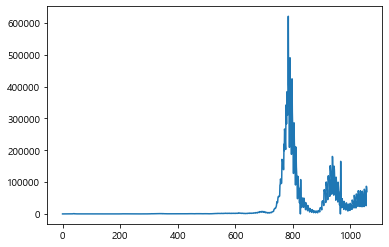

In [118]:
plt.plot(korea_data)


## 연도별 분리

연도별 코로나 추이를 확인할 것이다.

그러기 위해서 date_label 변수에서 기간을 분리해서 그에 맞는 데이터를 제공하는 함수를 만들어야 한다.


In [119]:
def get_date_index(value: str):
    return np.where(date_label == value)[0][0]


def data_by_date(input_data: np.ndarray, start_data: str, end_date: str):
    '''
    주어진 기간에 맞게 데이터를 잘라주는 함수
    start_date와 end_date까지 해당하는 데이터를 모은 np.array를 반환

    start_data: "M/D/YY"(월/일/년 순서)
    end_data: "M/D/YY"(월/일/년 순서)
    '''
    try:
        start = get_date_index(start_data)
        end = get_date_index(end_date)
        # print(start)
        return input_data[start:end]
    except IndexError:
        raise ValueError("cannot find the data that is requested")


# test
print(data_by_date(korea_data, "1/22/20", "12/31/20"))


[   1    0    1    0    1    1    0    0    0    7    1    3    0    1
    3    4    1    0    1    2    1    0    0    0    0    1    1    1
    0   73  100  229  169  231  144  284  505  571  813  586  599  851
  435  467  505  448  273  164   35  242  114  110  107   76   74   84
   93  152   87  147  162    0   76  100  104   91  146  105   78  125
  101   89   86   94   81   47   47   53   39   27   30   32   25   27
   27   22   22   18    8   13    9   11   14   10   10   10   14    9
    4    9    6   13    8    3    2    4   12   18   34   35   27   26
   29   27   19   13   15   13   32   12   20   23   25   16   19   40
   79   58   39   27   35   38   49   39   39   51   57   38   38   50
   45   56   48   34   36   34   43   59   49   67   48   17   46   51
   28   39   51   62   42   43   50   54   63   63   61   46   44   63
   49   45   35   44   62   33   39   61   60   39   34   26   45   63
   59   41  113   58   25   28   48   18   36   31   30   23   34   33
   43 

이를 이용해서 년도별 확진자수 그래프를 그릴 수 있다.

우선 그래프에서 날자별 눈금을 표시할 수 있는 함수를 정의하는 것으로 시작할 것이다.


In [120]:
#
def generate_tick(start_date: int, end_date: int, option: str):
    '''
    option: y/m/d
    '''
    def match_label(index: int):
        return date_label[index]

    def match_tick(index: int):
        return get_date_index(index)

    def month_to_int(date: str):
        temp = date.split('/')
        # assgin unique value to year + month + date value
        return int(temp[0])*100+int(temp[1]) + int(temp[2])*10000

    def increase_month(date: str):
        temp = date.split('/')
        if (int(temp[0]) == 12):
            return f"1/1/{int(temp[2])+1}"
        else:
            return f"{int(temp[0])+1}/1/{int(temp[2])}"

    # refactor input
    if isinstance(start_date, str):
        start_date = get_date_index(start_date)

    if isinstance(end_date, str):
        end_date = get_date_index(end_date)

    start_date_str = date_label[start_date]
    end_date_str = date_label[end_date]

    vmatch_label = np.vectorize(match_label)
    vmatch_tick = np.vectorize(match_tick)

    ticks = []
    tick_labels = []
    if (option == 'd'):
        ticks = np.array(list(range(start_date, end_date+1)))
        # 그래프에서 보여질 틱은 (실제틱 - start 틱)이므로 start_date를 빼준다.
        ticks = ticks-start_date
        tick_labels = vmatch_label(ticks)
        return(ticks, tick_labels)

    elif (option == 'm'):
        tick_label = start_date_str
        while(True):
            tick_label = increase_month(tick_label)
            if (month_to_int(tick_label) < month_to_int(end_date_str)):
                tick_labels.append(tick_label)
                continue
            else:
                break

        tick_labels = np.array(tick_labels)
        ticks = vmatch_tick(tick_labels)
        ticks = ticks-start_date
        return(ticks, tick_labels)

    # 연도에 따른 날짜를 표기하는 것은 프로젝트에서 사용하지 않아서 제작하지 않았다.
    elif (option == 'y'):
        raise AssertionError("WIP.")

    else:
        raise ValueError(
            "Wrong 'option' value. possible input is 'd', 'm', 'y'.")

# test
# print(generate_tick("1/22/20", "12/31/20", "m"))


위 함수를 통해서 1/22/20 - 12/31/20까지의 데이터를 그릴 때 눈금을 아래와 같이 달마다 표시할 수 있게 되었다.

(날자를 다루는 부분이다 보니 코드가 길어졌다.)

'2/1/20', '3/1/20', '4/1/20', '5/1/20', '6/1/20', '7/1/20', '8/1/20', '9/1/20', '10/1/20', '11/1/20', '12/1/20'

최종적으로 그래프를 그래면 아래처럼 그려진다. 이때 세 그래프의 확진자수 값이 모두 다르다는 사실을 알고 있어야 한다. 세 그래프의 확진자수의 최댓값을 동일하게 맞추어서 축의 비율을 동일하게 설정할 수 있지만, 2022년 3월달의 그래프가 최댓값이 60만명이기에 다른 시기의 확진자수 동향이 잘 드러나지 않아서 각기 다른 비율로 그래프가 그려지도록 했다.


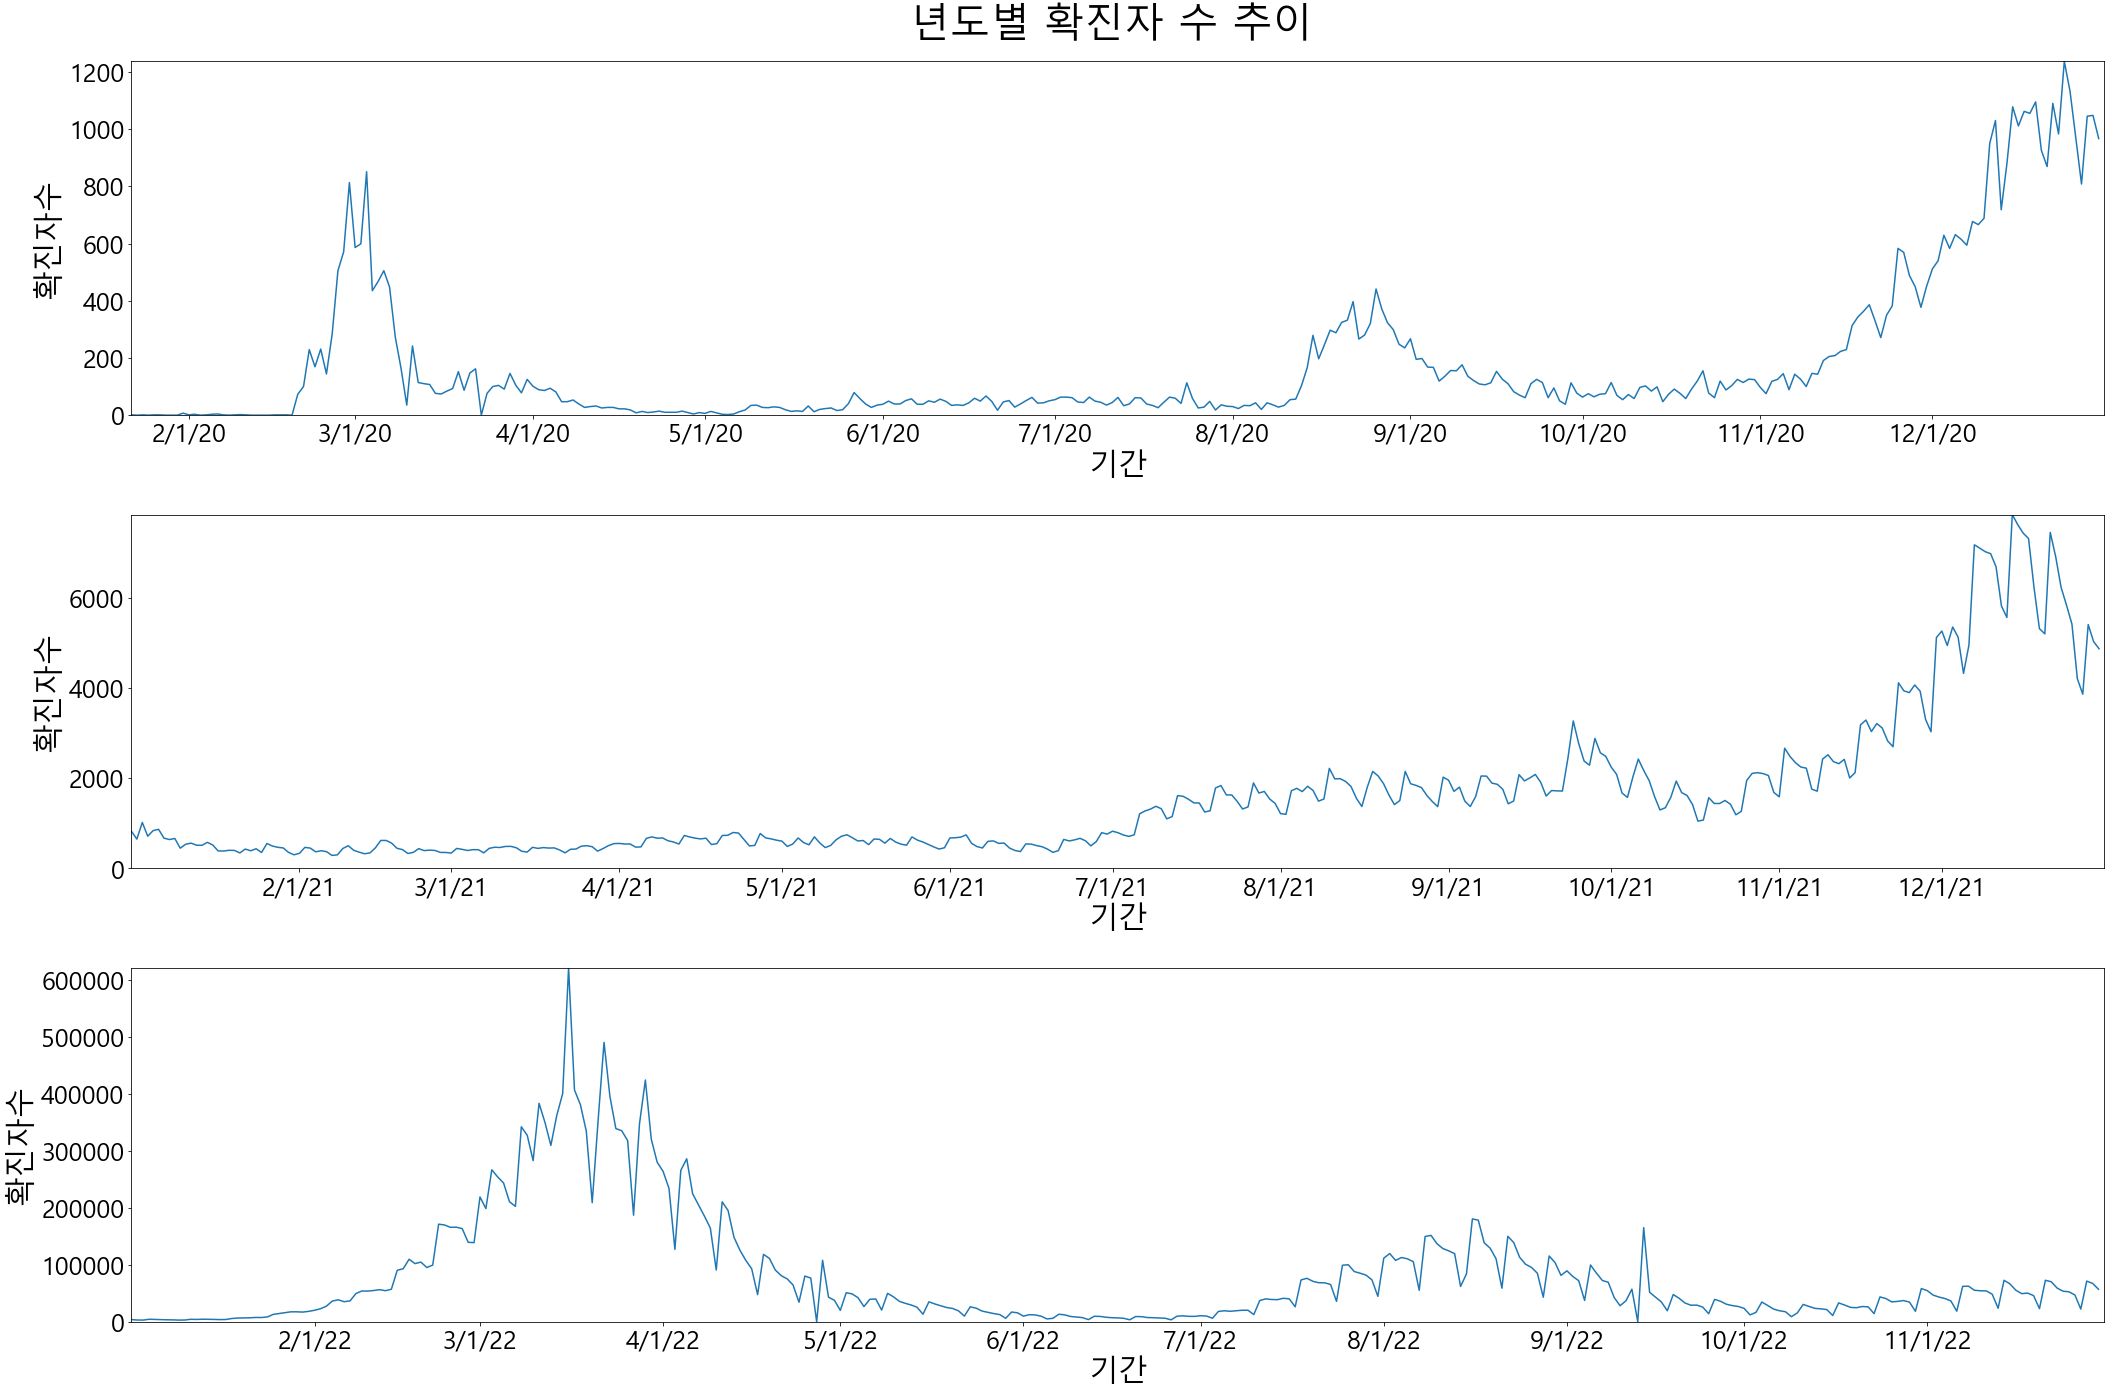

In [121]:
fig, axs = plt.subplots(3, figsize=(30, 20))
fig.tight_layout(pad=8.0)
fig.suptitle('년도별 확진자 수 추이', fontsize=40)
year_data = [data_by_date(korea_data, "1/22/20", "12/31/20"),
             data_by_date(korea_data, "1/1/21", "12/31/21"),
             data_by_date(korea_data, "1/1/22", "12/1/22")]

tick_data = [generate_tick("1/22/20", "12/31/20", "m"), generate_tick(
    "1/1/21", "12/31/21", "m"), generate_tick("1/1/22", "12/1/22", "m")]

for i in range(3):
    axs[i].set_xlim(left=0, right=len(year_data[i]))
    axs[i].set_ylim(bottom=0, top=np.max(year_data[i]))
    axs[i].set_xlabel("기간", fontsize = 30)
    axs[i].set_ylabel("확진자수", fontsize = 30)
    axs[i].set_xticks(tick_data[i][0])
    axs[i].set_xticklabels(tick_data[i][1])
    axs[i].tick_params(axis='both', which='major', labelsize=25)
    axs[i].plot(year_data[i])


위 통계자료를 통해 알 수 있는 점 아래와 같다.
- 코로나 대규모 발생 주기는 뚜렷하지 않다.
- 7,8월~10,11월의 기간동안 확진자수가 잠시 증가하고 조금 감소하는 모양을 보인다.
- 12월 달에 확진자수가 급격히 증가한다.
- 2020년, 2022년에는 3월 부근에 확진자 수의 급격한 변화가 있다.
- 확진자수는 해를 거듭할수록 지속적으로 증가하는 중이다.


#### 코로나 대규모 발생 주기는 뚜렷하지 않다.

그래프를 통해 대규모 발생 주기 뚜렷하지 않다는 것은 그래프를 보면 알 수 있다.

#### 7,8월~10,11월의 기간동안 확진자수가 잠시 증가하고 조금 감소하는 모양을 보인다.

그래프를 통해 알 수 있다. 

나는 대유행 과정을 조사하면서 이것이 우연일 가능성이 있다는 것을 알게 되었다. 추가적인 자료조사 결과, 1,2차 대유행 이후 발생한 대유행은 모두 변이가 원인이었다. 이때 변이가 한국에서 발견되 시기가 마침 7,8월~10,11월이었다. 즉, 7,8월~10,11월의 기간이 유행의 원인이었다기보다 변이가 7,8월~10,11월에 한국에 상륙했기 때문이라고 보는 것이 더 타당하고 나는 생각했다.

그래서 그래프에 대한 이 해석은 최종적으로 적절하지 않다고 결론지었다.

#### 2020년, 2022년에는 3월 부근에 확진자 수의 급격한 변화가 있다.

이 또한 2020년, 2022년 3월에 발생한 사건에 의해 일어난 현상이지, 계절, 시기적 특성에 의한 것으로 보기 어렵다고 결론지었다. 참고로 2020년 3월에는 신천지로 인한 대유행이 있었고, 2022년 3월에는 방역완화에 오미크론의 출현이 겹쳐진 대유행이었다. 

#### 확진자수는 해를 거듭할수록 지속적으로 증가하는 중이다.

내가 세운 가설 중 가장 확실한 것이다. 아래 그래프를 보면 더 명확해진다. 확진자 수를 로그 스케일로 설정했다. 

(로그스케일을 사용해서 확진자수가 0명인 지점에서 자료가 조금 이상하게 보인다)

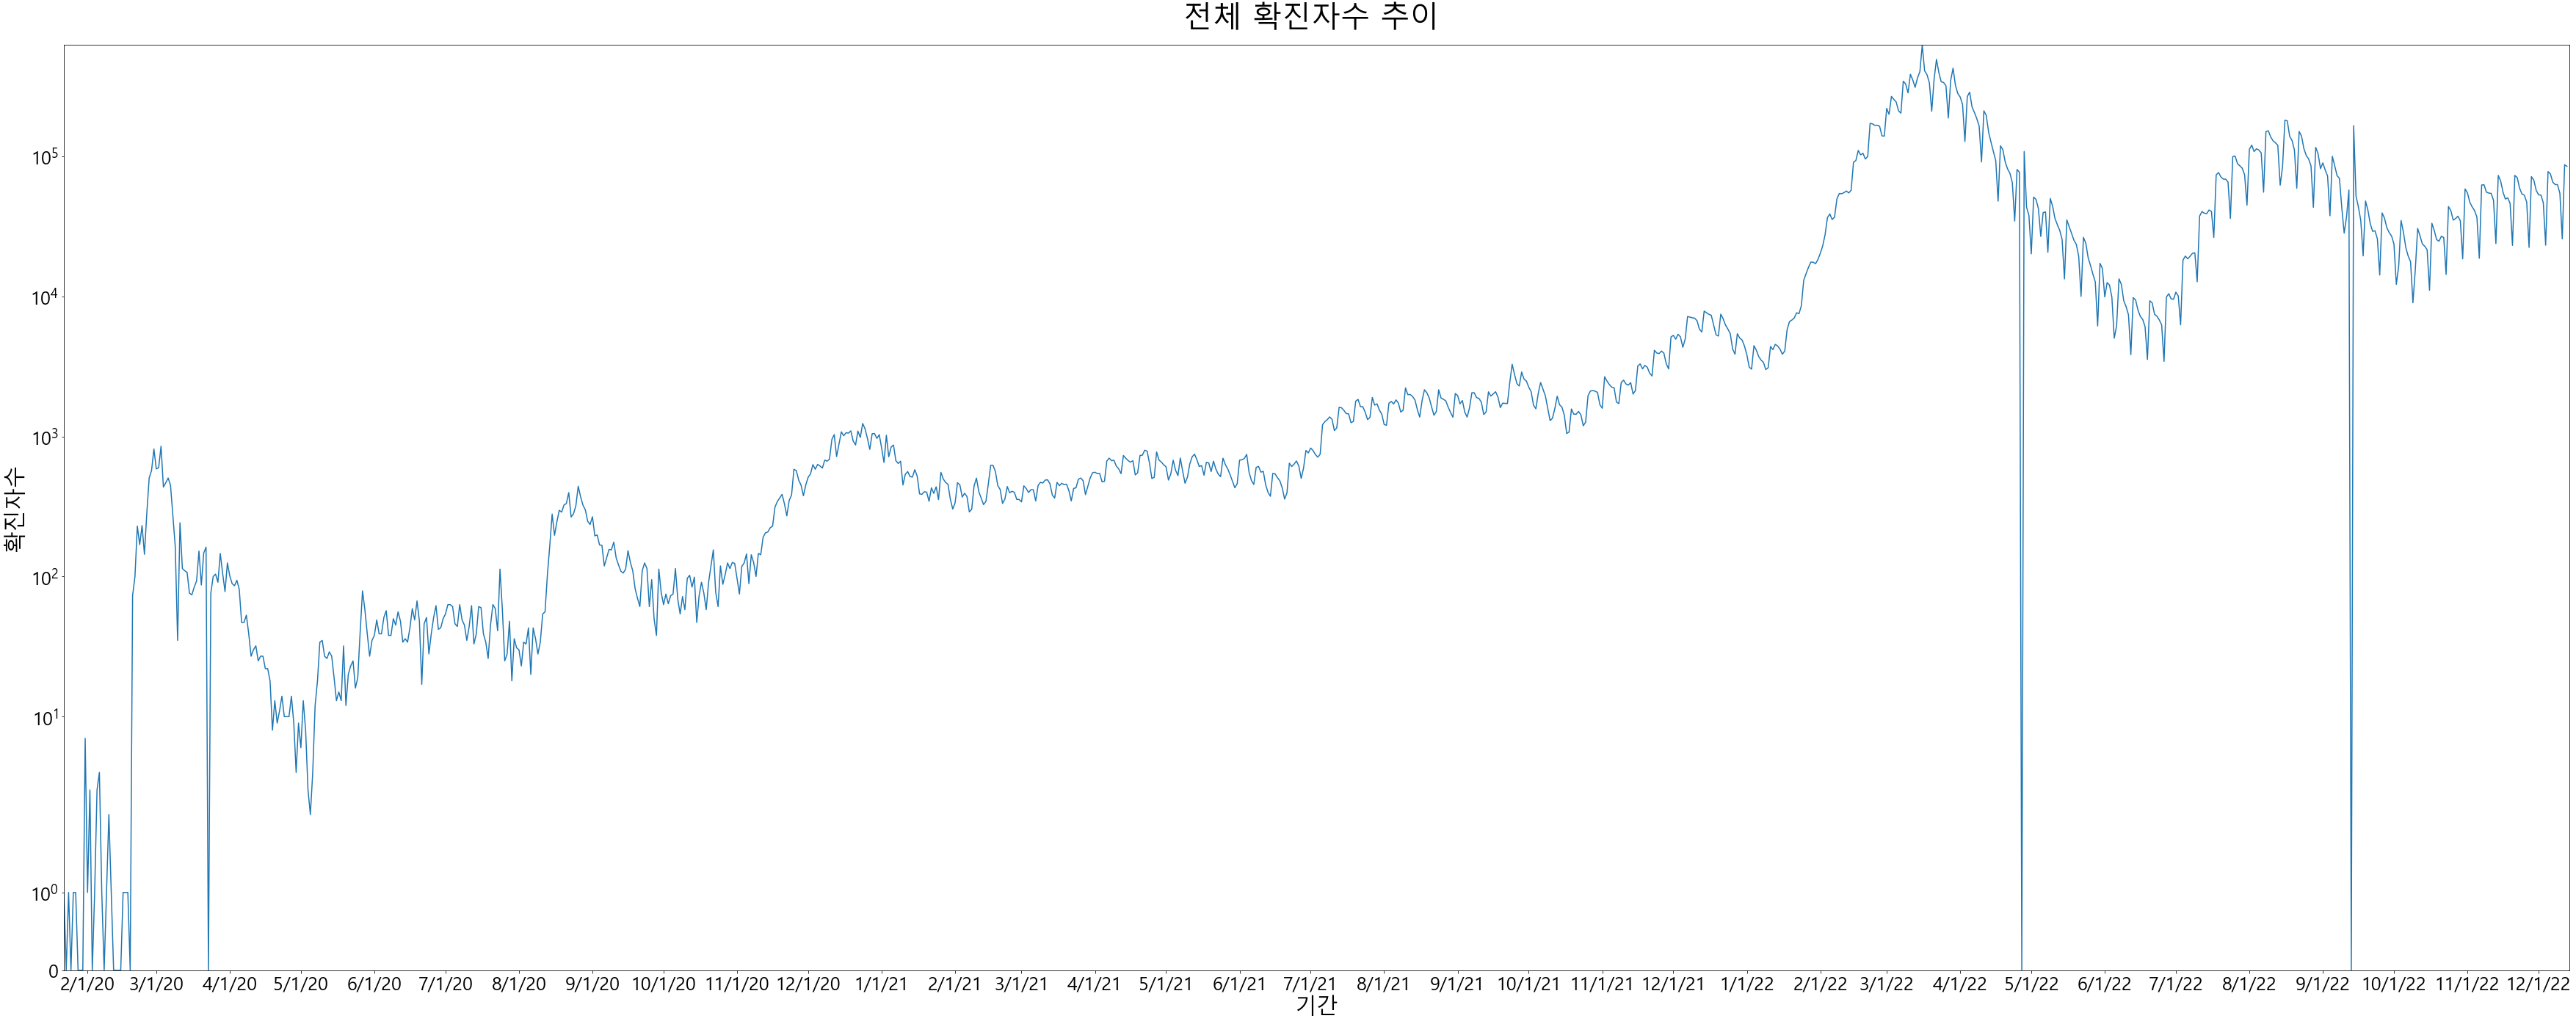

In [125]:
fig, axs = plt.subplots(1, figsize=(50, 20))
fig.tight_layout(pad=8.0)
fig.suptitle('전체 확진자수 추이', fontsize=40)
year_data = [data_by_date(korea_data, "1/22/20","12/14/22")]

tick_data = [generate_tick("1/22/20","12/14/22", "m")]


axs.set_xlim(left=0, right=len(year_data[0]))
axs.set_ylim(bottom=0, top=np.max(year_data[0]))
axs.set_xlabel("기간", fontsize = 30)
axs.set_ylabel("확진자수", fontsize = 30)
axs.set_xticks(tick_data[0][0])
axs.set_xticklabels(tick_data[0][1])
axs.set_yscale('symlog')
axs.tick_params(axis='both', which='major', labelsize=25)
axs.plot(year_data[0])


3년동안의 확진자수 추이를 보았을 때 로그스케일임에도 불구하고 꾸준히 확진자수가 증가하는 것 보인다.

위 그래프의 회귀선을 그려보면 아래와 같은데,

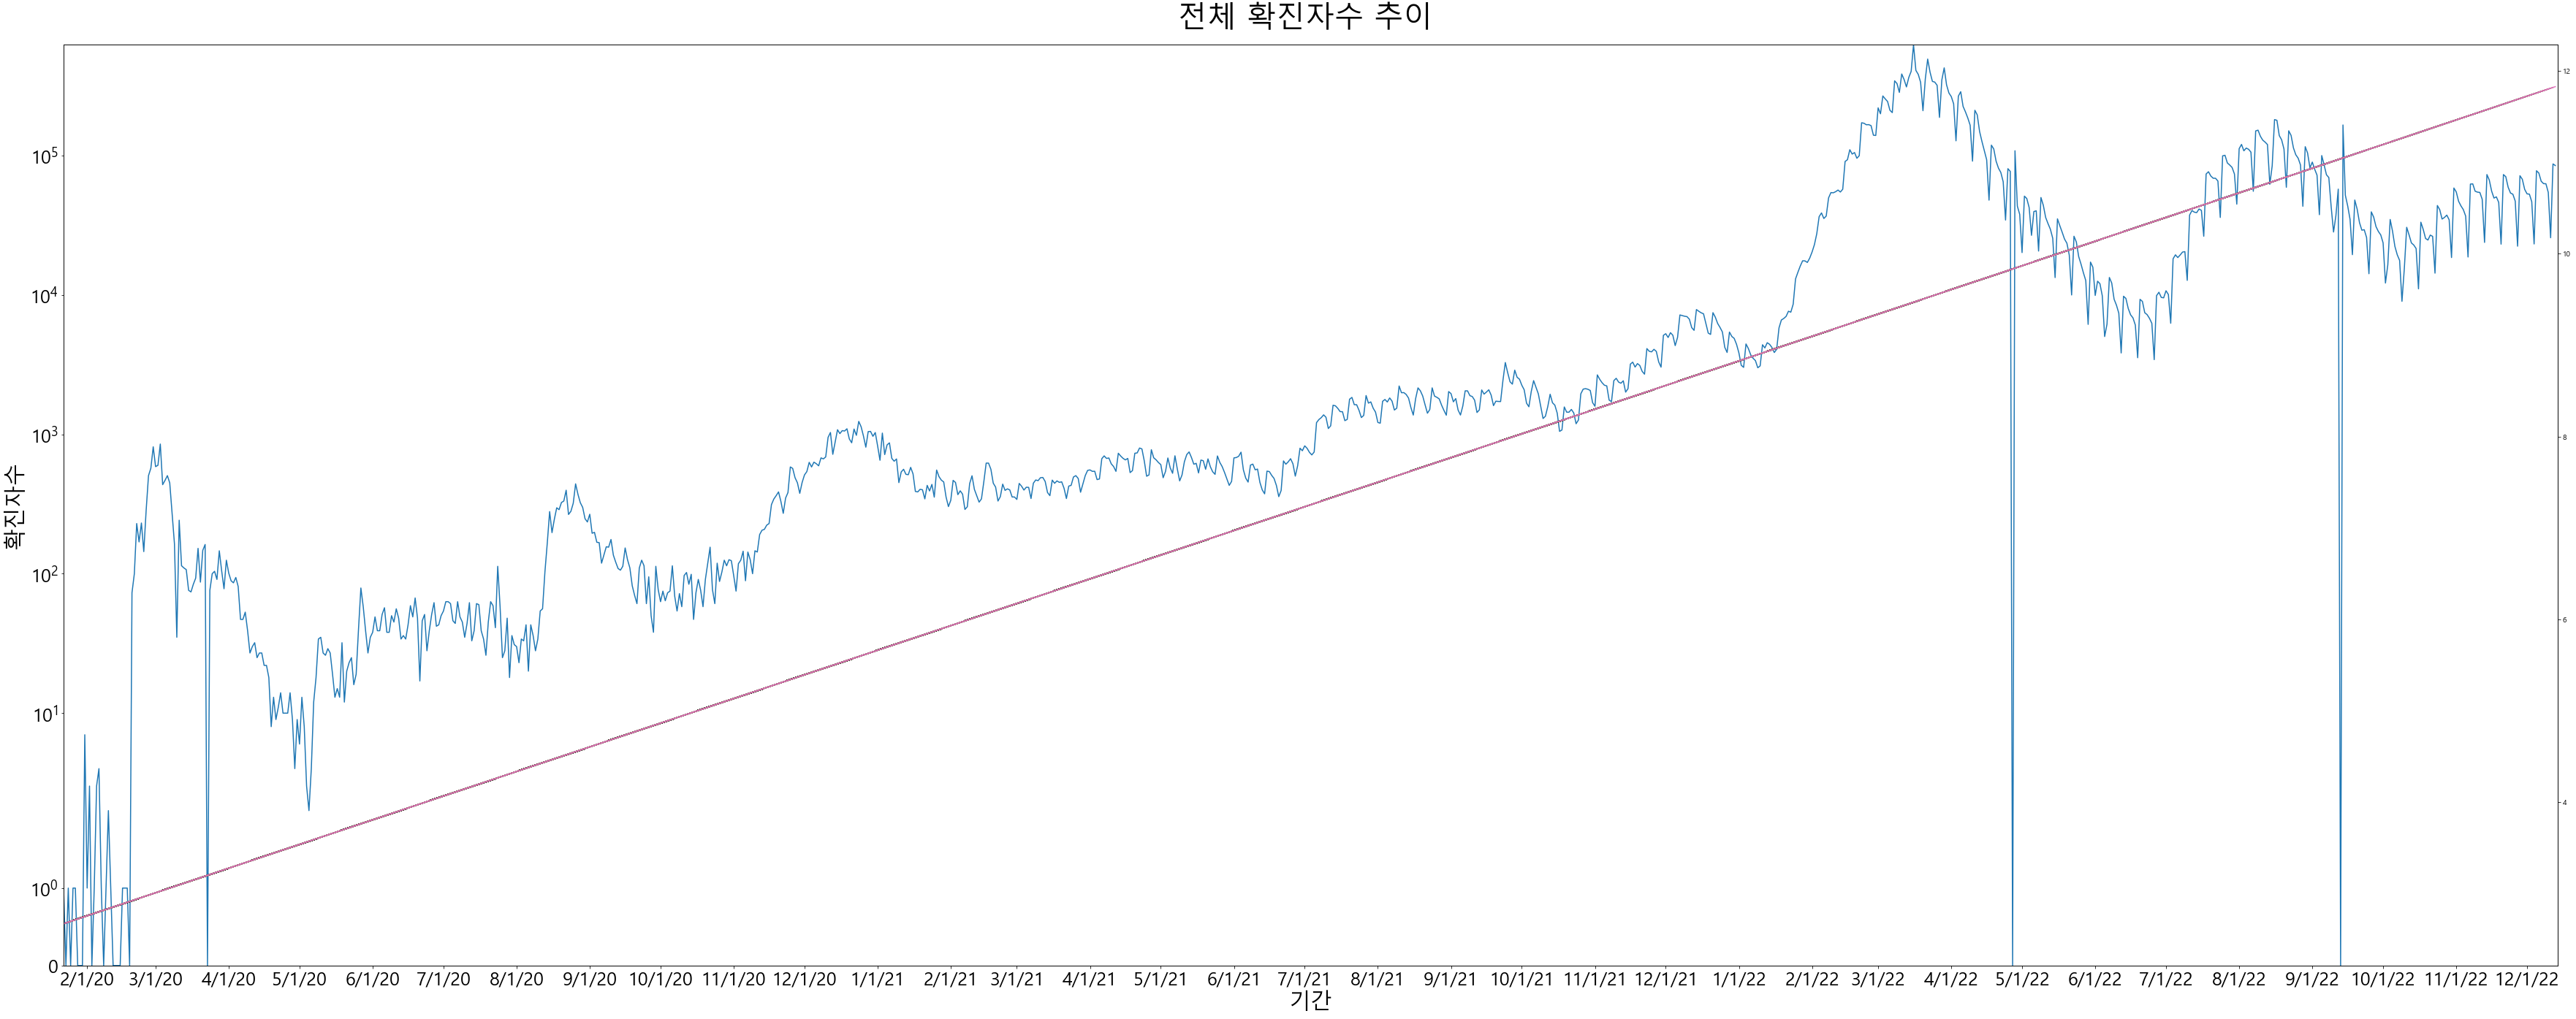

In [124]:
fig, axs = plt.subplots(1, figsize=(50, 20))
fig.tight_layout(pad=8.0)
fig.suptitle('전체 확진자수 추이', fontsize=40)
year_data = [data_by_date(korea_data, "1/22/20","12/14/22")]

tick_data = [generate_tick("1/22/20","12/14/22", "m")]

# 회귀
line = np.polyfit(range(len(year_data[0])), np.log(year_data[0]+1), 1)

axs.set_xlim(left=0, right=len(year_data[0]))
axs.set_ylim(bottom=0, top=np.max(year_data[0]))
axs.set_xlabel("기간", fontsize = 30)
axs.set_ylabel("확진자수", fontsize = 30)
axs.set_xticks(tick_data[0][0])
axs.set_xticklabels(tick_data[0][1])
axs.set_yscale('symlog')
axs.tick_params(axis='both', which='major', labelsize=25)
axs.plot(year_data[0])

x = np.linspace(0,range(len(year_data[0])))
y = line[0]*x + line[1]
ax_reg = axs.twinx() 
ax_reg.set_yscale('linear')
temp = ax_reg.plot(x, y)

확진자의 수가 거의 지수적으로 증가중이라는 사실을 알 수 있다. 만약 확진자수의 증가율이 이정도로 계속 유지된다면, 의료체계의 부담은 점점 증가할 것으로 생각된다.

그나마 다행인점은 2022년 11월 이후부터는 회귀선 아래로 내려가는 중이니 지수적 증가에서 약간 이탈할 수도 있어 보인다. 다만, 이것은 데이터가 더 쌓여야 확신할 수 있는 정보일 것이다.